<div class="alert alert-warning">

### **TASK:**

<div class="alert alert-info">

We took our train dataset, did some manipulations with it, and added two randomly generated features: one numeric, the other categorical. After that, we shuffled and renamed all the columns, except the targets, to the form - feature_0, feature_1... etc. There are 20 features in total. Next, we took 80% of the "samples" from this dataset.

Your task is to conduct an investigation using any methods from the lesson and find the names of random features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from classes import Paths
pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)

In [2]:
paths = Paths()
path = paths.rand_feat_selection_sample
df = pd.read_csv(path)
print(df.shape)
df.head(10)

(1870, 22)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target_reg,target_class
0,0,4.10,173,1,3.41,88182,157.17,"19,730,706.29",0,1,0,24,2015,192.00,2020,0.10,0,174,9,4.76,57.15,engine_ignition
1,0,4.30,173,1,-2.22,86897,121.81,"15,941,854.61",0,0,0,2,2015,193.55,2015,0.10,1,174,7,4.26,60.82,engine_ignition
2,0,4.25,174,1,-3.74,44604,175.89,"21,276,298.95",0,0,0,27,2013,177.92,2019,0.10,1,174,6,5.98,46.51,engine_ignition
3,0,4.34,172,1,3.14,114610,151.65,"22,504,399.73",0,0,0,49,2017,110.17,2016,0.70,1,174,20,4.42,30.71,gear_stick
4,1,4.14,148,0,-4.02,114851,159.55,"11,634,739.07",0,0,1,4,2017,190.92,2020,0.10,0,174,25,4.28,59.18,engine_fuel
5,0,4.04,173,1,3.09,60331,181.87,"9,630,788.14",0,0,0,18,2014,193.84,2022,0.00,1,174,8,3.26,35.24,electro_bug
6,0,4.74,170,1,20.41,55236,101.43,"15,086,291.78",0,1,0,34,2014,197.00,2017,0.10,0,174,16,6.48,69.75,another_bug
7,0,3.97,171,1,-23.70,59036,180.41,"13,731,633.95",0,0,0,39,2014,187.34,2015,0.10,1,174,18,2.68,35.58,engine_fuel
8,0,4.20,174,1,9.51,82124,115.72,"14,021,420.19",0,0,0,24,2015,184.51,2016,0.00,1,174,5,4.26,35.75,electro_bug
9,0,4.01,174,1,6.46,38677,99.19,"12,157,765.27",0,0,0,46,2013,169.06,2018,0.10,1,174,5,4.28,39.11,engine_fuel


In [3]:
for i in df.columns:
    print(i, len(df[i].value_counts()))



feature_0 2
feature_1 1788
feature_2 28
feature_3 2
feature_4 1870
feature_5 1844
feature_6 1870
feature_7 1870
feature_8 2
feature_9 2
feature_10 2
feature_11 50
feature_12 7
feature_13 1566
feature_14 9
feature_15 86
feature_16 2
feature_17 1
feature_18 26
feature_19 253
target_reg 1543
target_class 9


<div class="alert alert-info">

### **1. Phik**

In [4]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'target_reg']


/Users/lecha/dev/comp-ds/.venv/lib/python3.12/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable feature_17 for analysis 1. Dropping this column
  warnings.warn(


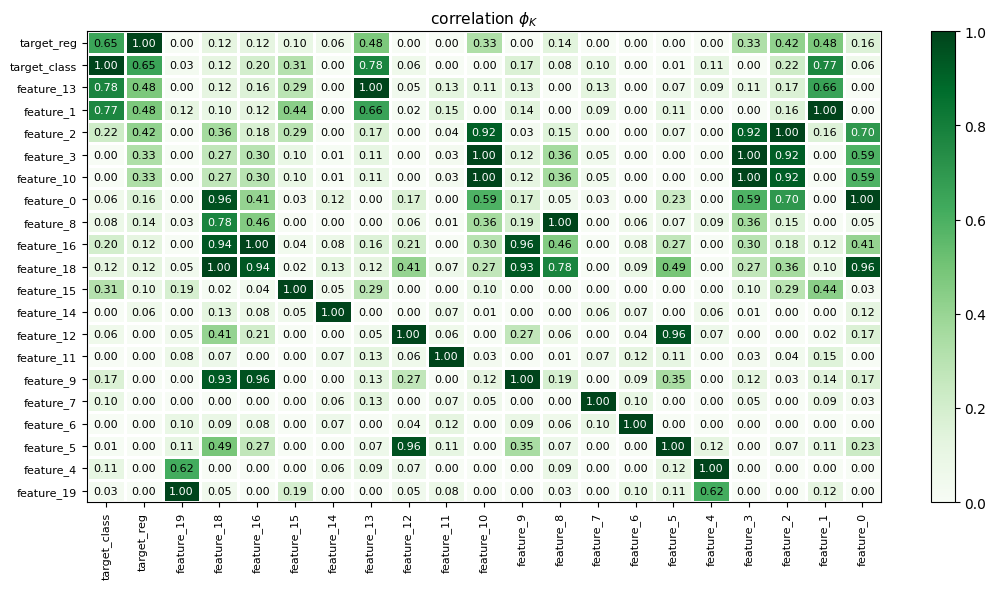

In [5]:
# phik_overview = df.drop(columns=['car_id']).phik_matrix().round(2).sort_values('target_reg')
phik_overview = df.phik_matrix().round(2).sort_values('target_reg')

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

<div class="alert alert-info">

### **2. Feature Importance**

In [6]:
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split

In [7]:
drop_cols = ['target_class', 'target_reg']
cat_cols = []

X = df.drop(drop_cols, axis=1, errors = 'ignore')
y = df['target_class'].fillna(0)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = CatBoostClassifier(random_state=42,
                           cat_features=cat_cols,
                           thread_count=-1)
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=100, plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.10885
0:	learn: 1.9401300	test: 1.9396361	best: 1.9396361 (0)	total: 61.4ms	remaining: 1m 1s
100:	learn: 0.3802341	test: 0.5344756	best: 0.5344756 (100)	total: 275ms	remaining: 2.45s
200:	learn: 0.2480990	test: 0.5305699	best: 0.5276631 (174)	total: 487ms	remaining: 1.93s
300:	learn: 0.1768603	test: 0.5309863	best: 0.5273900 (244)	total: 698ms	remaining: 1.62s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5273899569
bestIteration = 244

Shrink model to first 245 iterations.


In [10]:
# let's see the importance of catboost features
fi = model.get_feature_importance(prettified=True)
fi

,Feature Id,Importances
0,feature_13,32.00
1,feature_1,30.53
2,feature_15,12.86
3,feature_4,3.40
4,feature_2,3.28
5,feature_19,2.52
6,feature_6,2.43
7,feature_7,2.42
8,feature_11,2.23
9,feature_5,2.04


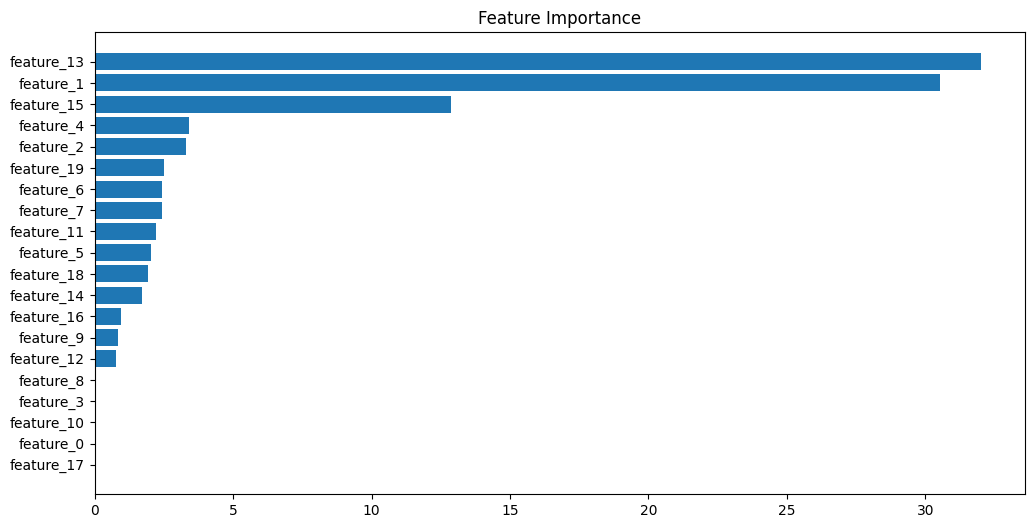

In [11]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');

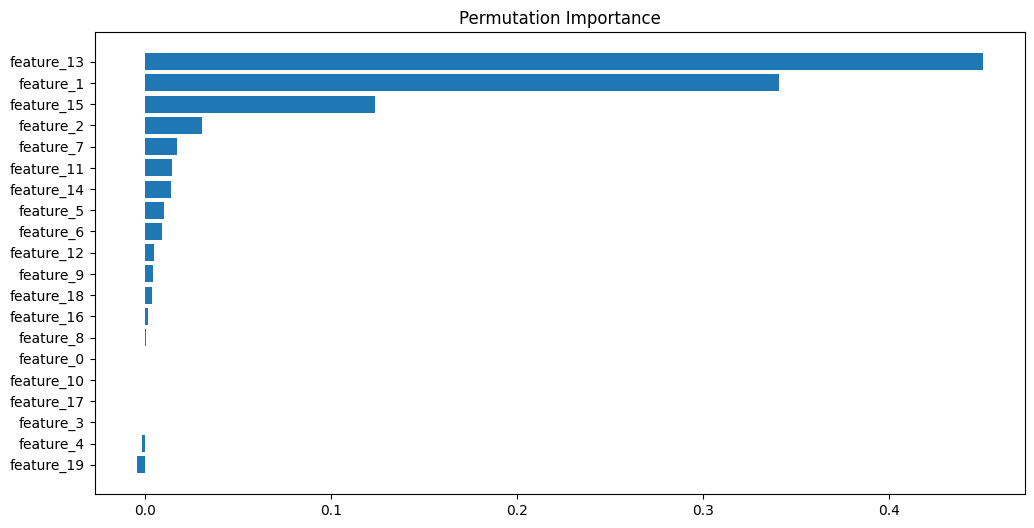

In [12]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance');

In [13]:
np.array(X.columns)[sorted_idx]

array(['feature_19', 'feature_4', 'feature_3', 'feature_17', 'feature_10',
       'feature_0', 'feature_8', 'feature_16', 'feature_18', 'feature_9',
       'feature_12', 'feature_6', 'feature_5', 'feature_14', 'feature_11',
       'feature_7', 'feature_2', 'feature_15', 'feature_1', 'feature_13'],
      dtype=object)

In [14]:
answer = ['feature_17', 'feature_0']
answer = ['feature_17', 'feature_3']
answer = ['feature_17', 'feature_4']
answer = ['feature_17', 'feature_5']
answer = ['feature_17', 'feature_6']
answer = ['feature_17', 'feature_7']
answer = ['feature_17', 'feature_8']
answer = ['feature_17', 'feature_10']
answer = ['feature_17', 'feature_19']
answer = ['feature_2', 'feature_10']
answer = ['feature_4', 'feature_19']

correct_answer = ['feature_6', 'feature_11'] # phik

<div class="alert alert-warning">

The mistake was in trying to find "bad" features, instead of trying to fing features that are "generated using random"